### Machine Learning Project1

Name : ABHRAJIT DAS <br>
U01880578

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
### Load Data 

In [4]:
# Loaded stock data of IBM using yfinance API

IBM_data = yf.download("IBM", start="2015-01-01", end="2021-12-31")


[*********************100%%**********************]  1 of 1 completed


In [5]:
IBM_data.shape

(1762, 6)

In [6]:
IBM_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,154.216064,156.128113,153.919693,154.933075,105.479950,5779673
2015-01-05,154.177826,154.177826,152.189301,152.495224,103.820236,5104898
2015-01-06,152.648178,152.925430,148.346085,149.206497,101.581253,6429448
2015-01-07,150.286804,150.286804,147.256210,148.231354,100.917351,4918083
2015-01-08,149.369019,152.045883,148.709366,151.453156,103.110771,4431693


Adj_Open/Adj_Close — An adjusted opening/closing price is a stock’s price on any given day of trading that has been   revised to include any dividend distributions, stock splits, and other corporate actions that occurred at any time     before the next day’s open. <br>
High/Low — It tracks the highest and the lowest price of the stock during a particular day of trading.


### Exploratory Data Analysis

In [7]:
# check for data type and missing values:

IBM_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2015-01-02 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1762 non-null   float64
 1   High       1762 non-null   float64
 2   Low        1762 non-null   float64
 3   Close      1762 non-null   float64
 4   Adj Close  1762 non-null   float64
 5   Volume     1762 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.4 KB


In [8]:
IBM_data.duplicated().sum()

0

In [9]:
features = IBM_data.columns
features

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<AxesSubplot:xlabel='Volume'>

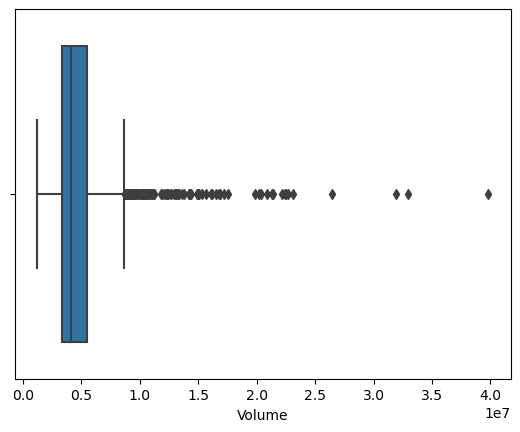

In [10]:
sns.boxplot(x=IBM_data['Volume'])    

##Just removing outliers from the stock time series is generally not a good idea: 
There may be possibility of profit days and losses.

In [11]:
#For that we should normalize the data where:
#Transforming variables can also eliminate outliers. These transformed values reduces the variation caused by extreme values.
# Normalize the data 


In [12]:
# find the min max of the column
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [13]:
IBM_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,154.216064,156.128113,153.919693,154.933075,105.479950,5779673
2015-01-05,154.177826,154.177826,152.189301,152.495224,103.820236,5104898
2015-01-06,152.648178,152.925430,148.346085,149.206497,101.581253,6429448
2015-01-07,150.286804,150.286804,147.256210,148.231354,100.917351,4918083
2015-01-08,149.369019,152.045883,148.709366,151.453156,103.110771,4431693
...,...,...,...,...,...,...
2021-12-23,130.000000,130.960007,129.520004,130.630005,119.913544,3649000
2021-12-27,130.630005,131.649994,129.949997,131.619995,120.822311,4293900
2021-12-28,131.600006,133.220001,131.589996,132.630005,121.749466,3445200


###  ML Classifier Models:
K-Nearest Neighbors (KNN) <br>
Random Forest Classifier (RF) <br>
Gradient Boosting Classifier (GB) <br>
Support Vector Machines (SVMs) <br>
XGBoost Classifier


In [14]:
scoreparam_df = pd.DataFrame(columns = ['Classifier', 'Stategy', 'Accuracy', 'Precision', 'Recall'])

#### 1. K-Nearest Neighbors (KNN)

In [16]:
# created function to get Accuracy, Precision, Recall

def model_accuracy_precision_recall(y_test, y_pred):
    print("\n\n================== Accuracy, Precision, Recall ==================")
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))

In [48]:
def store_modelscore(algo, stategy, y_test, y_pred):
    
    # Store the scores for comparision  
    
    acc = metrics.accuracy_score(y_test, y_pred)
    pre = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    #print(acc, pre, rec)
    scoreparam_df = score_df.append({'Classifier' : algo, 'Stategy' : stategy, 'Accuracy' : acc, 'Precision': pre,'Recall': rec}, 
                ignore_index = True)
    
    print(scoreparam_df)


In [49]:
def fitting_datato_knnmodel(Stategy, X_train, y_train, X_test, y_test):
    # Building K-Nearest Neighbors model 
    knearest = KNeighborsClassifier()

    # fit the model with data
    knearest.fit(X_train, y_train)
    
    # Predict the X_test using KNN
    y_pred=knearest.predict(X_test)

    print("\n\n*****confusion matrix *****")
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cnf_matrix)
    
    model_accuracy_precision_recall(y_test, y_pred)
    print("\n\n***************** classification report ****************")
    print(classification_report(y_test, y_pred))
    #store_modelscore('KNN', Stategy, y_test, y_pred)    
    
    return y_pred


#### 2. Random Forest Classifier (RF)

In [91]:
def fitting_datato_rfmodel(Stategy, X_train, y_train, X_test, y_test):
    # Building Random Forest model 
    random_forest = RandomForestClassifier()

    # fit the model with data
    random_forest.fit(X_train, y_train)

    # Predict the Xtest data with random_forest  model 
    y_pred = random_forest.predict(X_test)

    print("\n\n******** confusion matrix ******************")
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cnf_matrix)
    
    model_accuracy_precision_recall(y_test, y_pred)
    print("\n\n****************** classification report ******************")
    print(classification_report(y_test, y_pred))
    
    #store_modelscore('RF', Stategy, y_test, y_pred)  
    return y_pred

#### 3) Gradient Boosting Classifier (GB)

In [51]:

def fitting_datato_gradient_boostermodel(Stategy, X_train, y_train, X_test, y_test):
    # Building gradient_booster model 
    gradient_booster = GradientBoostingClassifier()

    # fit the model with data
    gradient_booster.fit(X_train, y_train)

    # Predict the Xtest data with random_forest  model 
    y_pred = gradient_booster.predict(X_test)

    print("\n\n******** confusion matrix ********")
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cnf_matrix)
   
    model_accuracy_precision_recall(y_test, y_pred)
    print("\n\n****************** classification report ******************")
    print(classification_report(y_test, y_pred))
    
    #store_modelscore('GB', Stategy, y_test, y_pred)  
    return y_pred

#### 4) Support Vector Machines (SVMs)

In [52]:

def fitting_datato_svmmodel(Stategy, X_train, y_train, X_test, y_test):
    # Building svc model 
    svc = SVC()
    
    # fit the model with data
    svc.fit(X_train, y_train)

    # Predict the Xtest data with svc  model 
    y_pred = svc.predict(X_test)

    print("\n\n********* confusion matrix **********")
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cnf_matrix)
   
    model_accuracy_precision_recall(y_test, y_pred)
    print("\n\n****************** classification report ******************")
    print(classification_report(y_test, y_pred))
    
    #store_modelscore('GB', Stategy, y_test, y_pred)    
    return y_pred

#### 5) XGBoost Classifier

In [53]:
def fitting_datato_xgboostmodel(Stategy, X_train, y_train, X_test, y_test):
    
    #The XG boosting decision tree algorithm.
    xcb_model = XGBClassifier()

    # fit the model with data
    xcb_model.fit(X_train, y_train)

    # Predict the Xtest data with XG model 
    y_pred = xcb_model.predict(X_test)

    print("\n\n******** confusion matrix *********")
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cnf_matrix)
                           
    model_accuracy_precision_recall(y_test, y_pred)
    print("\n\n****************** classification report ****************")
    print(classification_report(y_test, y_pred))
    return y_pred

###  Strategy-1: 
If the next trading day's close price is greater than today's close price then,  the signal is ‘buy’,  otherwise ‘sell’.

In [54]:
IBM_data_Strategy1 = IBM_data.copy()

In [55]:
# normalize the values
for col in IBM_data_Strategy1.columns:
        IBM_data_Strategy1[col] = min_max_scaling(IBM_data_Strategy1[col])

In [56]:
# Parameterized XGBoost gives error label value -1

IBM_data_Strategy1['label'] = np.where(IBM_data_Strategy1['Close'].shift(-1) > IBM_data_Strategy1['Close'], 1, -1)

In [57]:
IBM_data_Strategy1['label'].value_counts()

 1    911
-1    851
Name: label, dtype: int64

### Spilt the data into training and test datasets (use the 80,20 percent ratio.)

In [58]:
label = IBM_data_Strategy1['label']
features_col = IBM_data_Strategy1.drop(['label'], axis = 1)


In [59]:
# Dividing the dataset in train (80%) and test (20%)

X_train, X_test, y_train, y_test = train_test_split(features_col, label, test_size = 0.2, random_state = 40)


#### 1)  KNN

In [60]:
y_pred = fitting_datato_knnmodel('Stategy1', X_train, y_train, X_test, y_test)
acc_knn_stat1 = metrics.accuracy_score(y_test, y_pred)
pre_knn_stat1 = metrics.precision_score(y_test, y_pred)
rec_knn_stat1 = metrics.recall_score(y_test, y_pred)

scoreparam_df = scoreparam_df.append({'Classifier' : 'KNN', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_knn_stat1, 'Precision': pre_knn_stat1,'Recall': rec_knn_stat1}, 
                ignore_index = True)




*****confusion matrix *****
[[ 76 100]
 [ 83  94]]


================== Accuracy, Precision, Recall ==================
Accuracy: 0.48158640226628896
Precision: 0.4845360824742268
Recall: 0.5310734463276836


***************** classification report ****************
              precision    recall  f1-score   support

          -1       0.48      0.43      0.45       176
           1       0.48      0.53      0.51       177

    accuracy                           0.48       353
   macro avg       0.48      0.48      0.48       353
weighted avg       0.48      0.48      0.48       353



C:\Users\Abhra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Abhra\AppData\Local\Temp\ipykernel_7312\240345179.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoreparam_df = scoreparam_df.append({'Classifier' : 'KNN', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_knn_stat1, 'Precision': pre_knn_stat1,'Recall': rec_knn_stat1},


In [61]:
scoreparam_df

,Classifier,Stategy,Accuracy,Precision,Recall
0,KNN,Stategy 1,0.481586,0.484536,0.531073
1,RF,Stategy 1,0.490085,0.492063,0.525424
2,GB,Stategy 1,0.504249,0.504902,0.581921
3,SVM,Stategy 1,0.501416,0.501597,0.887006
4,KNN Param tuned_n17,Stategy 1,0.526912,0.525773,0.576271
5,KNN Param tuned_n12,Stategy 1,0.524079,0.519824,0.666667
6,KNN,Stategy 1,0.481586,0.484536,0.531073


#### 2) Random Forest

In [31]:
y_pred = fitting_datato_rfmodel('Stategy1', X_train, y_train, X_test, y_test)

acc_rf_stat1 = metrics.accuracy_score(y_test, y_pred)
pre_rf_stat1 = metrics.precision_score(y_test, y_pred)
rec_rf_stat1 = metrics.recall_score(y_test, y_pred)

scoreparam_df = scoreparam_df.append({'Classifier' : 'RF', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_rf_stat1, 'Precision': pre_rf_stat1,'Recall': rec_rf_stat1}, 
                ignore_index = True)




******** confusion matrix ******************
[[80 96]
 [84 93]]


================== Accuracy, Precision, Recall ==================
Accuracy: 0.49008498583569404
Precision: 0.49206349206349204
Recall: 0.5254237288135594


****************** classification report ******************
              precision    recall  f1-score   support

          -1       0.49      0.45      0.47       176
           1       0.49      0.53      0.51       177

    accuracy                           0.49       353
   macro avg       0.49      0.49      0.49       353
weighted avg       0.49      0.49      0.49       353



C:\Users\Abhra\AppData\Local\Temp\ipykernel_7312\2012559531.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoreparam_df = scoreparam_df.append({'Classifier' : 'RF', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_rf_stat1, 'Precision': pre_rf_stat1,'Recall': rec_rf_stat1},


#### 3) Gradient Booster

In [32]:
y_pred = fitting_datato_gradient_boostermodel('Stategy1', X_train, y_train, X_test, y_test)

acc_gb_stat1 = metrics.accuracy_score(y_test, y_pred)
pre_gb_stat1 = metrics.precision_score(y_test, y_pred)
rec_gb_stat1 = metrics.recall_score(y_test, y_pred)

scoreparam_df = scoreparam_df.append({'Classifier' : 'GB', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_gb_stat1, 'Precision': pre_gb_stat1,'Recall': rec_gb_stat1}, 
                ignore_index = True)



******** confusion matrix ********
[[ 75 101]
 [ 74 103]]


================== Accuracy, Precision, Recall ==================
Accuracy: 0.5042492917847026
Precision: 0.5049019607843137
Recall: 0.5819209039548022


****************** classification report ******************
              precision    recall  f1-score   support

          -1       0.50      0.43      0.46       176
           1       0.50      0.58      0.54       177

    accuracy                           0.50       353
   macro avg       0.50      0.50      0.50       353
weighted avg       0.50      0.50      0.50       353



C:\Users\Abhra\AppData\Local\Temp\ipykernel_7312\2801576439.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoreparam_df = scoreparam_df.append({'Classifier' : 'GB', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_gb_stat1, 'Precision': pre_gb_stat1,'Recall': rec_gb_stat1},


#### 4) Support Vector Machines (SVMs)

In [33]:
y_pred = fitting_datato_svmmodel('Stategy1', X_train, y_train, X_test, y_test)

acc_svm_stat1 = metrics.accuracy_score(y_test, y_pred)
pre_svm_stat1 = metrics.precision_score(y_test, y_pred)
rec_svm_stat1 = metrics.recall_score(y_test, y_pred)

scoreparam_df = scoreparam_df.append({'Classifier' : 'SVM', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_svm_stat1, 'Precision': pre_svm_stat1,'Recall': rec_svm_stat1}, 
                ignore_index = True)




********* confusion matrix **********
[[ 20 156]
 [ 20 157]]


================== Accuracy, Precision, Recall ==================
Accuracy: 0.5014164305949008
Precision: 0.5015974440894568
Recall: 0.8870056497175142


****************** classification report ******************
              precision    recall  f1-score   support

          -1       0.50      0.11      0.19       176
           1       0.50      0.89      0.64       177

    accuracy                           0.50       353
   macro avg       0.50      0.50      0.41       353
weighted avg       0.50      0.50      0.41       353



C:\Users\Abhra\AppData\Local\Temp\ipykernel_7312\2378307156.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoreparam_df = scoreparam_df.append({'Classifier' : 'SVM', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_svm_stat1, 'Precision': pre_svm_stat1,'Recall': rec_svm_stat1},


#### 5) XGBoost

In [66]:
# Assuming y_train and y_test contain -1 and 1 values
y_train = (y_train + 1) // 2  # Map -1 to 0, and 1 to 1
y_test = (y_test + 1) // 2

# Now, you can fit the XGBoost model as before
y_pred_xg = fitting_datato_xgboostmodel('Stategy1', X_train, y_train, X_test, y_test)

# Calculate accuracy, precision, and recall
acc_xgb_stat1 = metrics.accuracy_score(y_test, y_pred_xg)
pre_xgb_stat1 = metrics.precision_score(y_test, y_pred_xg)
rec_xgb_stat1 = metrics.recall_score(y_test, y_pred_xg)

# Append the results to your DataFrame
scoreparam_df = scoreparam_df.append({'Classifier' : 'XGBoost', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_xgb_stat1, 'Precision': pre_xgb_stat1,'Recall': rec_xgb_stat1}, 
                ignore_index = True)



******** confusion matrix *********
[[ 70 106]
 [ 75 102]]


================== Accuracy, Precision, Recall ==================
Accuracy: 0.48725212464589235
Precision: 0.49038461538461536
Recall: 0.576271186440678


****************** classification report ****************
              precision    recall  f1-score   support

           0       0.48      0.40      0.44       176
           1       0.49      0.58      0.53       177

    accuracy                           0.49       353
   macro avg       0.49      0.49      0.48       353
weighted avg       0.49      0.49      0.48       353



C:\Users\Abhra\AppData\Local\Temp\ipykernel_7312\278453946.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoreparam_df = scoreparam_df.append({'Classifier' : 'XGBoost', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_xgb_stat1, 'Precision': pre_xgb_stat1,'Recall': rec_xgb_stat1},


### Strategy-2: 
Utilize the 50-day moving average vs the 200-day moving average.

In [67]:
IBM_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,154.216064,156.128113,153.919693,154.933075,105.479950,5779673
2015-01-05,154.177826,154.177826,152.189301,152.495224,103.820236,5104898
2015-01-06,152.648178,152.925430,148.346085,149.206497,101.581253,6429448
2015-01-07,150.286804,150.286804,147.256210,148.231354,100.917351,4918083
2015-01-08,149.369019,152.045883,148.709366,151.453156,103.110771,4431693
...,...,...,...,...,...,...
2021-12-23,130.000000,130.960007,129.520004,130.630005,119.913544,3649000
2021-12-27,130.630005,131.649994,129.949997,131.619995,120.822311,4293900
2021-12-28,131.600006,133.220001,131.589996,132.630005,121.749466,3445200


In [68]:
# Computing the rolling averages

IBM_data_strategy2 = IBM_data.copy()

IBM_data_strategy2['50_MV'] = IBM_data_strategy2['Close'].rolling(50).mean()
IBM_data_strategy2['200_MV'] = IBM_data_strategy2['Close'].rolling(200).mean()

IBM_data_strategy2 = IBM_data_strategy2.dropna()

IBM_data_strategy2['label'] = IBM_data_strategy2.apply(lambda row:0 if row[f'50_MV'] > row[f'200_MV'] else 1, axis = 1)


In [69]:
#50>200 ----------------------death----0
#200>50---------------------golden-----1

In [70]:
IBM_data_strategy2

,Open,High,Low,Close,Adj Close,Volume,50_MV,200_MV,label
Date,,,,,,,,,
2015-10-16,143.833649,144.550674,142.695984,143.776291,100.141388,3643950,141.918355,152.709847,1
2015-10-19,143.260040,143.374756,141.854691,142.657745,99.362297,8320616,141.805544,152.648470,1
2015-10-20,136.223709,136.596558,134.101334,134.455063,93.649071,16762778,141.497514,152.558270,1
2015-10-21,134.082214,136.386230,133.173996,134.722748,93.835495,7312168,141.218546,152.485851,1
2015-10-22,135.506699,138.690247,135.391968,137.753342,95.946312,5840027,140.987762,152.433461,1
...,...,...,...,...,...,...,...,...,...
2021-12-23,130.000000,130.960007,129.520004,130.630005,119.913544,3649000,122.731735,131.443115,1
2021-12-27,130.630005,131.649994,129.949997,131.619995,120.822311,4293900,122.622452,131.491225,1
2021-12-28,131.600006,133.220001,131.589996,132.630005,121.749466,3445200,122.510043,131.539748,1


### Plot

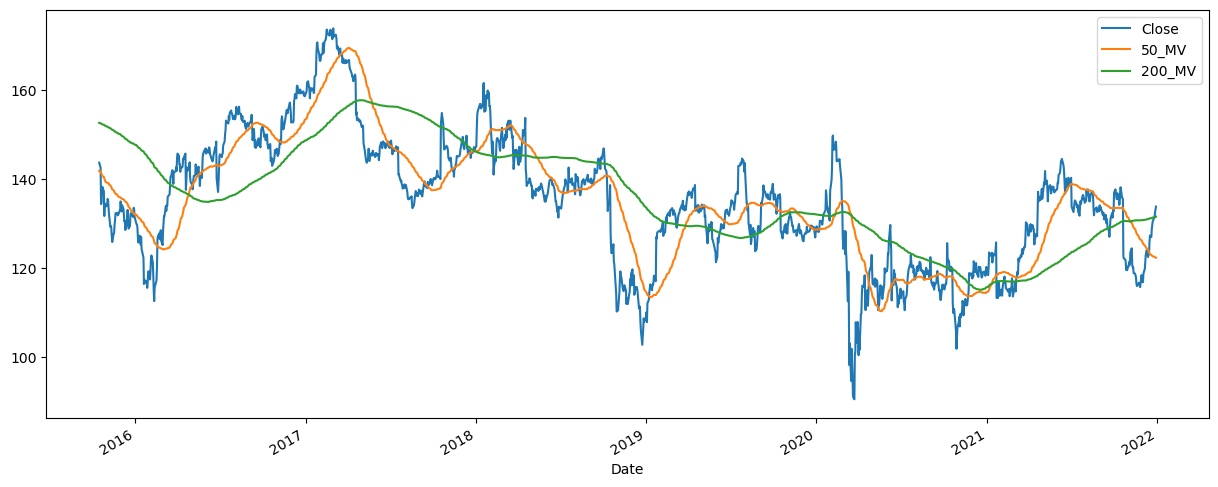

In [71]:
IBM_data_strategy2['Close'].plot()
IBM_data_strategy2['50_MV'].plot(figsize= (15, 6))
IBM_data_strategy2['200_MV'].plot(figsize= (15, 6))
plt.legend()

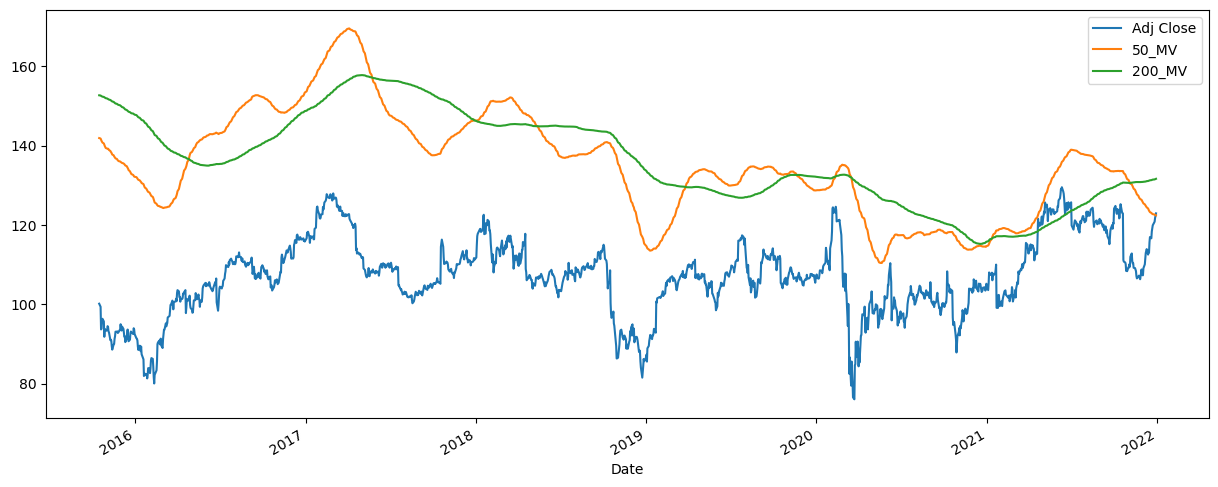

In [72]:
IBM_data_strategy2['Adj Close'].plot()
IBM_data_strategy2['50_MV'].plot(figsize= (15, 6))
IBM_data_strategy2['200_MV'].plot(figsize= (15, 6))
plt.legend()

In [73]:
IBM_data_strategy2

,Open,High,Low,Close,Adj Close,Volume,50_MV,200_MV,label
Date,,,,,,,,,
2015-10-16,143.833649,144.550674,142.695984,143.776291,100.141388,3643950,141.918355,152.709847,1
2015-10-19,143.260040,143.374756,141.854691,142.657745,99.362297,8320616,141.805544,152.648470,1
2015-10-20,136.223709,136.596558,134.101334,134.455063,93.649071,16762778,141.497514,152.558270,1
2015-10-21,134.082214,136.386230,133.173996,134.722748,93.835495,7312168,141.218546,152.485851,1
2015-10-22,135.506699,138.690247,135.391968,137.753342,95.946312,5840027,140.987762,152.433461,1
...,...,...,...,...,...,...,...,...,...
2021-12-23,130.000000,130.960007,129.520004,130.630005,119.913544,3649000,122.731735,131.443115,1
2021-12-27,130.630005,131.649994,129.949997,131.619995,120.822311,4293900,122.622452,131.491225,1
2021-12-28,131.600006,133.220001,131.589996,132.630005,121.749466,3445200,122.510043,131.539748,1


In [74]:
IBM_data_strategy2.shape


(1563, 9)

In [75]:
IBM_data_strategy2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1563 entries, 2015-10-16 to 2021-12-30
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1563 non-null   float64
 1   High       1563 non-null   float64
 2   Low        1563 non-null   float64
 3   Close      1563 non-null   float64
 4   Adj Close  1563 non-null   float64
 5   Volume     1563 non-null   int64  
 6   50_MV      1563 non-null   float64
 7   200_MV     1563 non-null   float64
 8   label      1563 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 122.1 KB


### Dividing the dataset in train (80%) and test (20%)

In [77]:
# Dividing the dataset in train (80%) and test (20%)
label_stat2 = IBM_data_strategy2['label']
features_col_stat2 = IBM_data_strategy2.drop(['label'], axis = 1)

X_train_stat2, X_test_stat2, y_train_stat2, y_test_stat2 = train_test_split(features_col_stat2, label_stat2, test_size = 0.2, random_state = 40)


#### 1) KNN

In [78]:
y_pred = fitting_datato_knnmodel('Stategy2', X_train_stat2, y_train_stat2, X_test_stat2, y_test_stat2)

acc_knn_stat2 = metrics.accuracy_score(y_test_stat2, y_pred)
pre_knn_stat2 = metrics.precision_score(y_test_stat2, y_pred)
rec_knn_stat2 = metrics.recall_score(y_test_stat2, y_pred)

scoreparam_df = scoreparam_df.append({'Classifier' : 'KNN', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_knn_stat2, 'Precision': pre_knn_stat2,'Recall': rec_knn_stat2}, 
                ignore_index = True)



*****confusion matrix *****
[[85 63]
 [86 79]]


================== Accuracy, Precision, Recall ==================
Accuracy: 0.5239616613418531
Precision: 0.5563380281690141
Recall: 0.47878787878787876


***************** classification report ****************
              precision    recall  f1-score   support

           0       0.50      0.57      0.53       148
           1       0.56      0.48      0.51       165

    accuracy                           0.52       313
   macro avg       0.53      0.53      0.52       313
weighted avg       0.53      0.52      0.52       313



C:\Users\Abhra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Abhra\AppData\Local\Temp\ipykernel_7312\995231565.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoreparam_df = scoreparam_df.append({'Classifier' : 'KNN', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_knn_stat2, 'Precision': pre_knn_stat2,'Recall': rec_knn_stat2},


#### 2) Random forest

In [79]:
y_pred = fitting_datato_rfmodel('Stategy2', X_train_stat2, y_train_stat2, X_test_stat2, y_test_stat2)

acc_rf_stat2 = metrics.accuracy_score(y_test_stat2, y_pred)
pre_rf_stat2 = metrics.precision_score(y_test_stat2, y_pred)
rec_rf_stat2 = metrics.recall_score(y_test_stat2, y_pred)

scoreparam_df = scoreparam_df.append({'Classifier' : 'RF', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_rf_stat2, 'Precision': pre_rf_stat2,'Recall': rec_rf_stat2}, 
                ignore_index = True)



******** confusion matrix ******************
[[146   2]
 [  0 165]]


================== Accuracy, Precision, Recall ==================
Accuracy: 0.9936102236421726
Precision: 0.9880239520958084
Recall: 1.0


****************** classification report ******************
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       148
           1       0.99      1.00      0.99       165

    accuracy                           0.99       313
   macro avg       0.99      0.99      0.99       313
weighted avg       0.99      0.99      0.99       313



C:\Users\Abhra\AppData\Local\Temp\ipykernel_7312\3261403027.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoreparam_df = scoreparam_df.append({'Classifier' : 'RF', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_rf_stat2, 'Precision': pre_rf_stat2,'Recall': rec_rf_stat2},


#### 3) Gradient Booster

In [80]:
y_pred = fitting_datato_gradient_boostermodel('Stategy2', X_train_stat2, y_train_stat2, X_test_stat2, y_test_stat2)

acc_gb_stat2 = metrics.accuracy_score(y_test_stat2, y_pred)
pre_gb_stat2 = metrics.precision_score(y_test_stat2, y_pred)
rec_gb_stat2 = metrics.recall_score(y_test_stat2, y_pred)

scoreparam_df = scoreparam_df.append({'Classifier' : 'GB', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_gb_stat2, 'Precision': pre_gb_stat2,'Recall': rec_gb_stat2}, 
                ignore_index = True)



******** confusion matrix ********
[[148   0]
 [  0 165]]


================== Accuracy, Precision, Recall ==================
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


****************** classification report ******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       165

    accuracy                           1.00       313
   macro avg       1.00      1.00      1.00       313
weighted avg       1.00      1.00      1.00       313



C:\Users\Abhra\AppData\Local\Temp\ipykernel_7312\2223237497.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoreparam_df = scoreparam_df.append({'Classifier' : 'GB', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_gb_stat2, 'Precision': pre_gb_stat2,'Recall': rec_gb_stat2},


#### 4) Support Vector Machines (SVMs)

In [81]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# from sklearn.svm import LinearSVC

# Define model
# svm = LinearSVC(random_state=42)
# model = BaggingClassifier(base_estimator=svm, n_estimators=31, random_state=314)
# clf = make_pipeline(StandardScaler(), SVC())
# clf.fit(X_train_stat2, y_train_stat2)
# clf_preds=clf.predict(X_test_stat2)
# print('Accuracy : {}'.format(accuracy_score(X_test_stat2, clf_preds)))

In [82]:
y_pred = fitting_datato_svmmodel('Stategy2', X_train_stat2, y_train_stat2, X_test_stat2, y_test_stat2)
acc_svm_stat2 = metrics.accuracy_score(y_test_stat2, y_pred)
pre_svm_stat2 = metrics.precision_score(y_test_stat2, y_pred)
rec_svm_stat2 = metrics.recall_score(y_test_stat2, y_pred)

scoreparam_df = scoreparam_df.append({'Classifier' : 'SVM', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_svm_stat2, 'Precision': pre_svm_stat2,'Recall': rec_svm_stat2}, 
                ignore_index = True)



********* confusion matrix **********
[[ 79  69]
 [ 63 102]]


================== Accuracy, Precision, Recall ==================
Accuracy: 0.5782747603833865
Precision: 0.5964912280701754
Recall: 0.6181818181818182


****************** classification report ******************
              precision    recall  f1-score   support

           0       0.56      0.53      0.54       148
           1       0.60      0.62      0.61       165

    accuracy                           0.58       313
   macro avg       0.58      0.58      0.58       313
weighted avg       0.58      0.58      0.58       313



C:\Users\Abhra\AppData\Local\Temp\ipykernel_7312\2879316748.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoreparam_df = scoreparam_df.append({'Classifier' : 'SVM', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_svm_stat2, 'Precision': pre_svm_stat2,'Recall': rec_svm_stat2},


#### 5) XGBoost

In [83]:
y_pred = fitting_datato_xgboostmodel('Stategy2', X_train_stat2, y_train_stat2, X_test_stat2, y_test_stat2)

acc_xgb_stat2 = metrics.accuracy_score(y_test_stat2, y_pred)
pre_xgb_stat2 = metrics.precision_score(y_test_stat2, y_pred)
rec_xgb_stat2 = metrics.recall_score(y_test_stat2, y_pred)

scoreparam_df = scoreparam_df.append({'Classifier' : 'XGBoost', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_xgb_stat2, 'Precision': pre_xgb_stat2,'Recall': rec_xgb_stat2}, 
                ignore_index = True)



******** confusion matrix *********
[[148   0]
 [  1 164]]


================== Accuracy, Precision, Recall ==================
Accuracy: 0.9968051118210862
Precision: 1.0
Recall: 0.9939393939393939


****************** classification report ****************
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       148
           1       1.00      0.99      1.00       165

    accuracy                           1.00       313
   macro avg       1.00      1.00      1.00       313
weighted avg       1.00      1.00      1.00       313



C:\Users\Abhra\AppData\Local\Temp\ipykernel_7312\2120560940.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoreparam_df = scoreparam_df.append({'Classifier' : 'XGBoost', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_xgb_stat2, 'Precision': pre_xgb_stat2,'Recall': rec_xgb_stat2},


### Hypertuning some classifiers

### 1) KNN

In [84]:
def param_tuned_knn(X_train_stat2, y_train_stat2, X_test_stat2, y_test_stat2):

    # use the best hyperparameters
    knn = KNeighborsClassifier(n_neighbors = 17,leaf_size = 10, weights = 'distance',algorithm = 'brute',metric = 'euclidean')
    
    # fit the model with data
    knn.fit(X_train_stat2, y_train_stat2)

    # Predict the Xtest data with knn model 
    y_pred = knn.predict(X_test_stat2)

    print("\n\n===== confusion matrix =====")
    cnf_matrix = metrics.confusion_matrix(y_test_stat2, y_pred)
    print(cnf_matrix)
   
    model_accuracy_precision_recall(y_test_stat2, y_pred)
    print("\n\n=================== classification report ===================")
    print(classification_report(y_test_stat2, y_pred))
    
    return y_pred
    

In [85]:
def param_tuned_knn_1(X_train_stat2, y_train_stat2, X_test_stat2, y_test_stat2):

    # use the best hyperparameters
    knn1 = KNeighborsClassifier(n_neighbors = 100, leaf_size = 10, weights = 'distance',algorithm = 'brute',metric = 'euclidean')
    
    # fit the model with data
    knn1.fit(X_train_stat2, y_train_stat2)

    # Predict the Xtest data with knn model 
    y_pred = knn1.predict(X_test_stat2)

    print("\n\n===== confusion matrix =====")
    cnf_matrix = metrics.confusion_matrix(y_test_stat2, y_pred)
    print(cnf_matrix)
   
    model_accuracy_precision_recall(y_test_stat2, y_pred)
    print("\n\n=================== classification report ===================")
    print(classification_report(y_test_stat2, y_pred))
    
    return y_pred

In [86]:
y_pred = param_tuned_knn(X_train_stat2, y_train_stat2, X_test_stat2, y_test_stat2)

acc_pramtuned_knn_stat2 = metrics.accuracy_score(y_test_stat2, y_pred)
pre_pramtuned_knn_stat2 = metrics.precision_score(y_test_stat2, y_pred)
rec_pramtuned_knn_stat2 = metrics.recall_score(y_test_stat2, y_pred)

scoreparam_df = scoreparam_df.append({'Classifier' : 'KNN Param tuned_n17', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_pramtuned_knn_stat2, 'Precision': pre_pramtuned_knn_stat2,'Recall': rec_pramtuned_knn_stat2}, 
                ignore_index = True)



===== confusion matrix =====
[[83 65]
 [75 90]]


================== Accuracy, Precision, Recall ==================
Accuracy: 0.5527156549520766
Precision: 0.5806451612903226
Recall: 0.5454545454545454


=================== classification report ===================
              precision    recall  f1-score   support

           0       0.53      0.56      0.54       148
           1       0.58      0.55      0.56       165

    accuracy                           0.55       313
   macro avg       0.55      0.55      0.55       313
weighted avg       0.55      0.55      0.55       313



C:\Users\Abhra\AppData\Local\Temp\ipykernel_7312\277482347.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoreparam_df = scoreparam_df.append({'Classifier' : 'KNN Param tuned_n17', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_pramtuned_knn_stat2, 'Precision': pre_pramtuned_knn_stat2,'Recall': rec_pramtuned_knn_stat2},


In [87]:
y_pred = param_tuned_knn_1(X_train_stat2, y_train_stat2, X_test_stat2, y_test_stat2)

acc_pramtuned_knn_1_stat2 = metrics.accuracy_score(y_test_stat2, y_pred)
pre_pramtuned_knn_1_stat2 = metrics.precision_score(y_test_stat2, y_pred)
rec_pramtuned_knn_1_stat2 = metrics.recall_score(y_test_stat2, y_pred)

scoreparam_df = scoreparam_df.append({'Classifier' : 'KNN Param tuned_n12', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_pramtuned_knn_1_stat2, 'Precision': pre_pramtuned_knn_1_stat2,'Recall': rec_pramtuned_knn_1_stat2}, 
                ignore_index = True)



===== confusion matrix =====
[[77 71]
 [67 98]]


================== Accuracy, Precision, Recall ==================
Accuracy: 0.5591054313099042
Precision: 0.5798816568047337
Recall: 0.593939393939394


=================== classification report ===================
              precision    recall  f1-score   support

           0       0.53      0.52      0.53       148
           1       0.58      0.59      0.59       165

    accuracy                           0.56       313
   macro avg       0.56      0.56      0.56       313
weighted avg       0.56      0.56      0.56       313



C:\Users\Abhra\AppData\Local\Temp\ipykernel_7312\468422104.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoreparam_df = scoreparam_df.append({'Classifier' : 'KNN Param tuned_n12', 'Stategy' : 'Stategy 2', 'Accuracy' : acc_pramtuned_knn_1_stat2, 'Precision': pre_pramtuned_knn_1_stat2,'Recall': rec_pramtuned_knn_1_stat2},


In [88]:
y_pred_stat1 = param_tuned_knn(X_train, y_train, X_test, y_test)

acc_pramtuned_knn_stat1 = metrics.accuracy_score(y_test, y_pred_stat1)
pre_pramtuned_knn_stat1 = metrics.precision_score(y_test, y_pred_stat1)
rec_pramtuned_knn_stat1 = metrics.recall_score(y_test, y_pred_stat1)

scoreparam_df = scoreparam_df.append({'Classifier' : 'KNN Param tuned_n17', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_pramtuned_knn_stat1, 'Precision': pre_pramtuned_knn_stat1,'Recall': rec_pramtuned_knn_stat1}, 
               ignore_index = True)




===== confusion matrix =====
[[ 84  92]
 [ 75 102]]


================== Accuracy, Precision, Recall ==================
Accuracy: 0.5269121813031161
Precision: 0.5257731958762887
Recall: 0.576271186440678


=================== classification report ===================
              precision    recall  f1-score   support

           0       0.53      0.48      0.50       176
           1       0.53      0.58      0.55       177

    accuracy                           0.53       353
   macro avg       0.53      0.53      0.53       353
weighted avg       0.53      0.53      0.53       353



C:\Users\Abhra\AppData\Local\Temp\ipykernel_7312\3905131008.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoreparam_df = scoreparam_df.append({'Classifier' : 'KNN Param tuned_n17', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_pramtuned_knn_stat1, 'Precision': pre_pramtuned_knn_stat1,'Recall': rec_pramtuned_knn_stat1},


In [89]:
y_pred_stat1 = param_tuned_knn_1(X_train, y_train, X_test, y_test)

acc_pramtuned_knn_1_stat1 = metrics.accuracy_score(y_test, y_pred_stat1)
pre_pramtuned_knn_1_stat1 = metrics.precision_score(y_test, y_pred_stat1)
rec_pramtuned_knn_1_stat1 = metrics.recall_score(y_test, y_pred_stat1)

scoreparam_df = scoreparam_df.append({'Classifier' : 'KNN Param tuned_n12', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_pramtuned_knn_1_stat1, 'Precision': pre_pramtuned_knn_1_stat1,'Recall': rec_pramtuned_knn_1_stat1}, 
               ignore_index = True)




===== confusion matrix =====
[[ 67 109]
 [ 59 118]]


================== Accuracy, Precision, Recall ==================
Accuracy: 0.5240793201133145
Precision: 0.5198237885462555
Recall: 0.6666666666666666


=================== classification report ===================
              precision    recall  f1-score   support

           0       0.53      0.38      0.44       176
           1       0.52      0.67      0.58       177

    accuracy                           0.52       353
   macro avg       0.53      0.52      0.51       353
weighted avg       0.53      0.52      0.51       353



C:\Users\Abhra\AppData\Local\Temp\ipykernel_7312\3032154453.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scoreparam_df = scoreparam_df.append({'Classifier' : 'KNN Param tuned_n12', 'Stategy' : 'Stategy 1', 'Accuracy' : acc_pramtuned_knn_1_stat1, 'Precision': pre_pramtuned_knn_1_stat1,'Recall': rec_pramtuned_knn_1_stat1},


### Model Comparision 

In [90]:
## Score
scoreparam_df.sort_values(by='Accuracy',ascending=False)
scoreparam_df


,Classifier,Stategy,Accuracy,Precision,Recall
0,KNN,Stategy 1,0.481586,0.484536,0.531073
1,RF,Stategy 1,0.490085,0.492063,0.525424
2,GB,Stategy 1,0.504249,0.504902,0.581921
3,SVM,Stategy 1,0.501416,0.501597,0.887006
4,KNN Param tuned_n17,Stategy 1,0.526912,0.525773,0.576271
5,KNN Param tuned_n12,Stategy 1,0.524079,0.519824,0.666667
6,KNN,Stategy 1,0.481586,0.484536,0.531073
7,XGBoost,Stategy 1,0.487252,0.490385,0.576271
8,XGBoost,Stategy 1,0.487252,0.490385,0.576271
9,KNN,Stategy 2,0.523962,0.556338,0.478788


***************************************************************************************************************************

## Strategy1: Best Accuracy is:  Gradient boost with accuracy if = 0.504249
## Strategy2: Best Accuracy is:  Random Forest with accuracy if = 0.996


***************************************************************************************************************************

THANK YOU